In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

print("✅ Dataset loaded successfully!")
print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

✅ Dataset loaded successfully!
Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=100,        # number of weak learners
    learning_rate=0.5,       # contribution of each classifier
    random_state=42
)

In [6]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [7]:
y_pred = ada_model.predict(X_test)
y_pred_proba = ada_model.predict_proba(X_test)[:, 1]

print("\n--- 📊 Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=data.target_names))


--- 📊 Model Evaluation ---
Accuracy: 0.9532
Precision: 0.9459
Recall: 0.9813
F1 Score: 0.9633
ROC AUC Score: 0.9893

Confusion Matrix:
 [[ 58   6]
 [  2 105]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        64
      benign       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



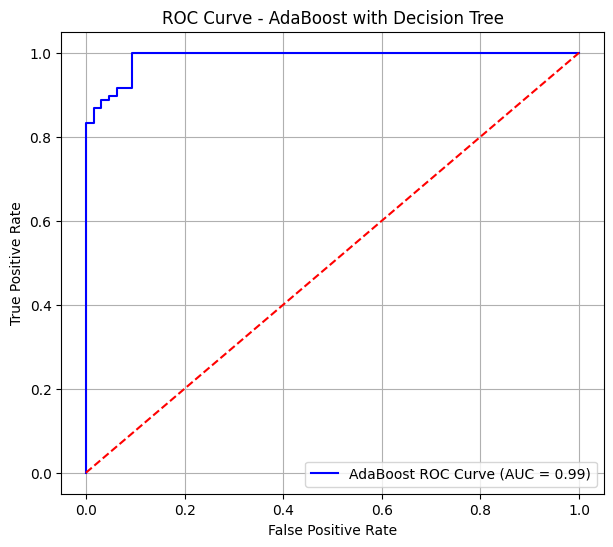

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',
         label=f"AdaBoost ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost with Decision Tree")
plt.legend()
plt.grid()
plt.show()